<a href="https://colab.research.google.com/github/BaichooSiddharth/Devoir_1_Data_Science/blob/master/Devoir_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nom** : Siddharth Baichoo\
**Matricule** : 20130259\
\
**Nom** : William Bach\
**Matricule** : 20127144\
\
**Nom** : Anthony Uyende\
**Matricule** : 20117140

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile

#QUESTION 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras.utils import np_utils

"""
#Les imports pour entraîner un réseau de neurones décommenter pour réentraîner (au besoin)

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
"""


#QUESTION 2)

#QUESTION 3)
import matplotlib.image as mpimg

#QUESTION 4)
import sys
!{sys.executable} -m pip install pyfpgrowth
import pyfpgrowth

%matplotlib inline
import pandas as pd



 **LOAD DATA**

In [ ]:
with zipfile.ZipFile("exo1/PATCH.amat.zip", 'r') as zip_ref:
    zip_ref.extractall("exo1")

"""
les données se trouvent dans le drive des étudiants dans une version zip
"""

'\nles données se trouvent dans le drive des étudiants dans une version zip\n'

## Question 1

Cette question est une compétition entre les équipes et sera évaluée en fonction de la précision du classifieur produit par chaque équipe. Les données sont contenues dans le fichier PATCH.amat et il s’agit de 50000 images (28 x 28) en noir et blanc codées en binaire. Les images sont abstraites et appartiennent à deux catégories distinctes. Le fichier contient une image par ligne et chaque ligne commence par 784=28 * 28 bits associés à la couleur des pixels et suivi d’un bit représentant la classe. Le codage du fichier est lisible, mais nécessite un prétraitement pour être utilisé. L’équipe doit produire un classifieur qui sera mis en production et évalué sur des données fraîches non disponibles à l’équipe (mais qui ont exactement la même distribution). Les équipes avec une solution minimalement raisonnable seront classées en ordre de précision et le rang sera transformé en note variant de 10 à 25 sur 25.

In [ ]:
'''
On va implémenter un CNN pour la classification des images code basé de https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
'''

data = np.loadtxt('exo1/PATCH.amat')

X_train, X_test = train_test_split(data, test_size = 0.2)

In [ ]:
print(X_train.shape)
X_value_train = X_train[:, 1:]
X_labels_train = X_train[:, 0]
X_value_test = X_test[:, 1:]
X_labels_test = X_test[:, 0]
X_value_train = X_value_train.reshape(X_value_train.shape[0], 28, 28, 1)
X_value_test = X_value_test.reshape(X_value_test.shape[0], 28, 28, 1)
n_classes = len(np.unique(X_labels_test))
Y_train = np_utils.to_categorical(X_labels_train, n_classes)
Y_test = np_utils.to_categorical(X_labels_test, n_classes)

(40000, 785)


In [ ]:
"""
#Code pour entraîner le réseau de neurones et le sauvegarder dans le directoire

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(16, activation='relu'))
# output layer
model.add(Dense(2, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_value_train, Y_train, batch_size=128, epochs=10, validation_data=(X_value_test, Y_test))

model.save("my_model")
"""

'\n#Code pour entraîner le réseau de neurones et le sauvegarder dans le directoire\n\n# building a linear stack of layers with the sequential model\nmodel = Sequential()\n# convolutional layer\nmodel.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding=\'valid\', activation=\'relu\', input_shape=(28,28,1)))\nmodel.add(MaxPool2D(pool_size=(1,1)))\n# flatten output of conv\nmodel.add(Flatten())\n# hidden layer\nmodel.add(Dense(16, activation=\'relu\'))\n# output layer\nmodel.add(Dense(2, activation=\'softmax\'))\n\n# compiling the sequential model\nmodel.compile(loss=\'categorical_crossentropy\', metrics=[\'accuracy\'], optimizer=\'adam\')\n\n# training the model for 10 epochs\nmodel.fit(X_value_train, Y_train, batch_size=128, epochs=10, validation_data=(X_value_test, Y_test))\n\nmodel.save("my_model")\n'

In [ ]:
#modèle reconstruit qui sera utilisé pour les tests
reconstructed_model = load_model("my_model")
reconstructed_model.fit(X_value_test, Y_test)

313/313 [==============================] - 10s 29ms/step - loss: 0.0160 - accuracy: 0.99550s - loss: 0.015 - ETA: 0s - loss: 0.0153 - accuracy


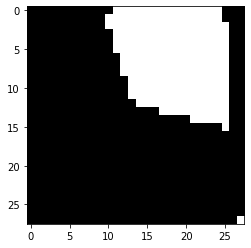

In [ ]:
plt.imshow(np.reshape(X_value_test[0], (28, 28)), cmap="gray")


L'accuracy de notre CNN est arrivé à environ 98.50 %.  Pour tester de nouvelles données, il faut juste remplacer les valeurs et les labels dans ce bout de code dans "reconstructed_model.fit(X_value_test, Y_test)" par les valeurs que l'on veut tester et on peut donner les nouveaux labels de notre nouvel ensemble de test en les mettant à la place de Y_test 

Maintenant on teste notre modèle sur l'ensemble de données qui ont été postées sur studium

In [ ]:
#on load les données du test_set à prédire
Final_testing_set  = np.loadtxt('exo1/test.csv')

#on sépare lez données en les valeurs et les labels et on reshape pour prendre la même forme que l'entrée et on convetit les labels en one versus all
Final_testing_set_values = Final_testing_set[:, 1:]
Final_testing_set_values = Final_testing_set_values.reshape(Final_testing_set_values.shape[0], 28, 28, 1)
Final_testing_set_labels = Final_testing_set[:, 0]
Final_testing_set_labels_ova = np_utils.to_categorical(Final_testing_set_labels, n_classes)

#on a les prédictions de notre modèle
predictions = reconstructed_model.predict_classes(Final_testing_set_values)

#Ici on checke l'accuracy des prédictions de notre modèle
reconstructed_model.fit(Final_testing_set_values, Final_testing_set_labels_ova)

250/250 [==============================] - 8s 31ms/step - loss: 0.0474 - accuracy: 0.9861


In [ ]:
#on sauvegarde les prédictions dans le fichier pred.csv
np.savetxt("pred.csv", predictions, delimiter=",")

Nous avons un accuracy de 98.49% avec les données qui ont été donnée pour être testée sur studium. 

## Question 2 
Imaginez qu’on vous donne un fichier contenant des données de nature astronomique. Il s’agit de données concernant 6500 milliards d’étoiles. Les données (dépassant la centaine de téraoctets) sont réparties sur 300 serveurs avec un accès rapide au disque et une bonne capacité de calcul. La connexion entre les serveurs est rapide, mais pas exceptionnelle.

Les données pour chaque étoile comporte, la position dans l’espace (x,y,z), la luminosité apparente de l’étoile et sa catégorie (10 catégories possibles). Aussi, pour chaque étoile une liste de ses caractéristiques physiques représentées par 22 nombres réels est incluse.

Proposez une approche distribuée qui permet de répondre aux questions suivantes et expliquez en détail toute la démarche permettant leur résolution.
Trouvez les 1000 paires d’étoiles les plus proches (distance euclidienne de la position).
Comptez combien d'étoiles il y a dans chaque catégorie.
Produisez un classifieur qui, étant donné le vecteur de caractéristiques (22 nombres réels), prédit la catégorie de l’étoile.


\
\
\
**1. Trouver les 1000 paires**

Premièrement il faut trouver les 1000 étoiles les plus proches de la terre sur chacun des 300 serveurs (pas moins car il se peut que les 1000 étoiles les plus proches se trouvent sur le même serveur).  Puis on envoie les 1000 étoiles les plus proches sur chacun des serveurs (3000000 d'étoiles <<< 6.5 trilliards étoiles) sur une machine avec une assez grande capacité puis on choisit les 1000 les plus proches parmi ces 3000000 étoiles. (Distance euclidienne = sqrt(x^2 + y^2 + z^3))


**2. Compter le nombre d'étoiles dans chaque catégorie**

Premièrement on compte le nombre de labels différents sur chacun des serveurs (comme on a 10 catégories ce sera plus simple après cela). Puis on envoie les résultats obtenus sur chacun des serveurs dans une seule machine (on a 3000 valeurs en tout, 10 pour chacun des serveurs donc le problème de communication est moindre). Comme cela on peut compter le nombre d'occurence de chacune des type d'étoiles


**3. Classifieur pour les 22 caractéristiques**


On entraîne chacun des serveurs avec un différent modèle (70% entrainement, 15% validation, 15% test) (pas besoin de 300 modèles différents mais on fait cela pour voir quel modèle correspondra mieux au jeu de données). Puis on choisit les 11 meilleurs modèles parmi les serveurs. Puis pour une nouvelle étoile on fait passer sur les modèles puis on fait un vote de majorité (11 classes pour couper au cas ou on a des égalités) 

## Question 3

Expliquez en détail comment utiliser un classifieur binaire, capable d’apprendre à effectuer la classification de deux catégories, pour réaliser la classification dans un contexte ou plusieurs catégories doivent être distinguées. Considérez le cas à 3, 25, 12500 catégories et faite le contraste entre les différentes approches étudiées et le nombre de catégories.


### **One vs. All**

\
\
Si nous nous retrouvons avec 3, 25, 12500, nous avons un problème de classification multi-classe donc non binaire.\
\
Mais nous pouvons réduire ce problème en problème de classfication binaire en utilisant la technique *One vs. All* . On transforme **N-classes** en **N modèles de classifcations binaires**\
\
Dans la classification one-vs-All, pour l'ensemble de données des instances de classe N, nous devons générer les modèles de classificateurs N-binaires. Le nombre d'étiquettes de classe présentes dans l'ensemble de données et le nombre de classificateurs binaires générés doivent être identiques.\
\
Dans le cas de **3 catégories**, on a l'illustration ci-dessous:

Text(0.5, 1.0, 'Exemple de One-vs-all')

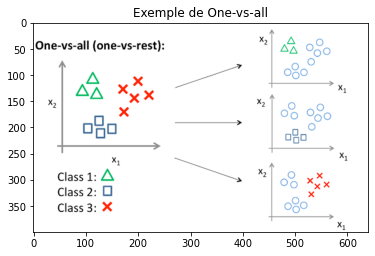

In [ ]:
plt.imshow(mpimg.imread("exo3/svm.png"))
plt.title("Exemple de One-vs-all")

Comme le montre l'image ci-dessus, considérons que nous avons trois classes, par exemple, le type 1 pour le vert, le type 2 pour le bleu et le type 3 pour le rouge.

Maintenant, comme on vous l'a dit plus tôt, nous devons générer le même nombre de classificateurs que les étiquettes de classe sont présentes dans l'ensemble de données, nous devons donc créer ici trois classificateurs binaires pour trois classes respectives.



*   Classificateur 1:- [Vert] vs [Rouge, Bleu]
* Classificateur 2 : [Bleu] vs [Vert, Rouge]
* Classificateur 3 : [Rouge] vs [Bleu, Vert]



Nous pourrons maintenant implémenter un algorithme pour la classification binaire (e.g.: Support de vecteurs machine) pour chaque Classificateur *i, i = 1,2,3*.

Cette approche exige que chaque modèle prévoie une probabilité d'appartenance à une classe ou un score de type probabiliste. L'argmax de ces scores (indice de classe avec le score le plus élevé) est ensuite utilisé pour prédire une classe.

### **One vs. One**

Mais nous pouvons également réduire ce problème, en problème de classfication binaire en utilisant la technique *One vs. One* . On transforme chaque classe en **N-classes** en **N*(N-1)/2  modèles de classifcations binaires** . Pendant les phases de classification, chaque classificateur prédit une classe. (Par opposition à une classe par rapport à une autre où chaque classificateur prédit une probabilité). Et la classe qui a été prédite le plus est la réponse.

* Classificateur 1: [Vert] vs [Rouge]
* Classificateur 2 : [Vert] vs [Bleu]
* Classificateur 3 : [Rouge] vs [Bleu]

## Question 4
Faites une analyse des patrons existants dans le jeu de données adulte. Il est possible que le regroupement de valeurs pour certaines caractéristiques donne des résultats intéressants. Vous devez aussi discuter de l’aspect éthique concernant l’utilisation des patrons obtenus.


\
\
\
Pour effectuer une analyse des patrons sur le dataset "adulte", nous utilisons l'algorithme FP-Tree car c'est une amelioration de l'algorithme A-Priori.\
\
Nous utilisons le code du projet "pyfpgrowth 1.0" (https://pypi.org/project/pyfpgrowth/).\

In [ ]:
# On lit les premieres lignes du jeu de donnees
df = pd.read_csv("exo4/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


\
On remarque que certaines variables categorielles sont des nombres (fnlwgt, education-num, etc).\
Ce format n'est pas adapte pour une analyse de patrons car c'est difficile a interpreter lorsqu'on ne sait pas a quoi correspondent les chiffres.\
Nous supprimons donc de notre dataset tous les attributs decimaux (entiers ou non).

In [ ]:
df = df.drop(columns="age")
df = df.drop(columns="fnlwgt")
df = df.drop(columns="education-num")
df = df.drop(columns="capitalgain")
df = df.drop(columns="capitalloss")
df = df.drop(columns="hoursperweek")

df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


\
Le projet "pyfpgrowth" necessite d'avoir des valeurs entieres dans l'univers U.\
\
Nous allons donc convertir chaque valeur categorielle en valeur entiere.\
D'abord, recuperons toutes les valeurs possibles pour chaque attribut.

In [ ]:
values_list = []

workclass_values = df['workclass'].unique()
values_list.append(workclass_values)
print("Workclass values :", workclass_values)

education_values = df['education'].unique()
values_list.append(education_values)
print("\nEducation-num values :", education_values)

marital_values = df['marital-status'].unique()
values_list.append(marital_values)
print("\nMarital values :", marital_values)

occupation_values = df['occupation'].unique()
values_list.append(occupation_values)
print("\nOccupation values :", occupation_values)

relationship_values = df['relationship'].unique()
values_list.append(relationship_values)
print("\nRelationship values :", relationship_values)

race_values = df['race'].unique()
values_list.append(race_values)
print("\nRace values :", race_values)

sex_values = df['sex'].unique()
values_list.append(sex_values)
print("\nSex values :", sex_values)

country_values = df['native-country'].unique()
values_list.append(country_values)
print("\nCountry values :", country_values)

class_values = df['class'].unique()
values_list.append(class_values)
print("\nClass values :", class_values)


Workclass values : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Education-num values : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Marital values : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Occupation values : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Relationship values : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Race values : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Sex values : ['Male' 'Female']

Country values : ['United-States' 'Cuba' 'Jamaica' 'Indi

\
Nous pouvons maintenant convertir chaque valeur en valeur entiere.\
La strategie est d'assigner les entiers dans l'ordre pour chaque attribut et de faire en sorte qu'aucune valeur n'ait le meme entier assigne.\
\
*Exemple : State-gov -> 0 ; Self-emp-not-inc -> 1 ; .. ; Bachelors -> 8 ; etc*\
\
Nous utilisons un dictionnaire pour faire correspondre chaque valeur a sa nouvelle valeur entiere.

In [ ]:
i = 0               # stores new integer values
new_values = dict() # Stores the new values 
for category in values_list:
    for value in category:
        new_values[value] = i
        i += 1

print(str(new_values))

{'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, nan: 64, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8, 'Bachelors': 9, 'HS-grad': 10, '11th': 11, 'Masters': 12, '9th': 13, 'Some-college': 14, 'Assoc-acdm': 15, 'Assoc-voc': 16, '7th-8th': 17, 'Doctorate': 18, 'Prof-school': 19, '5th-6th': 20, '10th': 21, '1st-4th': 22, 'Preschool': 23, '12th': 24, 'Never-married': 25, 'Married-civ-spouse': 26, 'Divorced': 27, 'Married-spouse-absent': 28, 'Separated': 29, 'Married-AF-spouse': 30, 'Widowed': 31, 'Adm-clerical': 32, 'Exec-managerial': 33, 'Handlers-cleaners': 34, 'Prof-specialty': 35, 'Other-service': 36, 'Sales': 37, 'Craft-repair': 38, 'Transport-moving': 39, 'Farming-fishing': 40, 'Machine-op-inspct': 41, 'Tech-support': 42, 'Protective-serv': 44, 'Armed-Forces': 45, 'Priv-house-serv': 46, 'Not-in-family': 47, 'Husband': 48, 'Wife': 49, 'Own-child': 50, 'Unmarried': 51, 'Other-relative': 52, 'White': 53, 'Black': 54, 'Asian-Pac-Islander'

\
Nous pouvons maintenant transformer le dataset en utilisant les valeurs entieres plutot que les valeurs categorielles.\
Nous utilisons un sous-ensemble du dataset pour des raisons de performance.

In [ ]:
# Convertir le dataset en liste Python
adult_list = df.values.tolist()
print("Original length of the dataset :", len(adult_list))
adult_list = adult_list[0:1500]
print("New length of the dataset :", len(adult_list))

Original length of the dataset : 48842
New length of the dataset : 1500


In [ ]:
# Assignation of the new values
for idx, datapoint in enumerate(adult_list):
    for i, xi in enumerate(datapoint):
        adult_list[idx][i] = new_values[xi]
            
print("Example of a new datapoint :", adult_list[0])

Example of a new datapoint : [0, 9, 25, 32, 47, 53, 58, 60, 102]


\
Nous cherchons les patrons frequents avec une probabilite d'au moins 90 % pour affiner les resultats.\

In [ ]:
# Application de l'algorithme FP-TREE
patterns = pyfpgrowth.find_frequent_patterns(adult_list, 100)
rules = pyfpgrowth.generate_association_rules(patterns, 0.9)

In [ ]:
for key in rules:
    print("\nLes caracteristiques :")
    for value in key:
        print(list(new_values.keys())[list(new_values.values()).index(value)])
    print("sont associees avec la(les) caracteristique(s) :")
    
    for idx, value in enumerate(rules[key]):
        if idx < len(rules[key]) -1:
            for caracteristic in rules[key][0]:
                print(list(new_values.keys())[list(new_values.values()).index(caracteristic)])
        else:
            print("avec une probabilite de", value)


Les caracteristiques :
Self-emp-not-inc
White
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9279279279279279

Les caracteristiques :
Self-emp-not-inc
United-States
sont associees avec la(les) caracteristique(s) :
White
avec une probabilite de 0.944954128440367

Les caracteristiques :
Unmarried
Female
sont associees avec la(les) caracteristique(s) :
<=50K
avec une probabilite de 0.9478260869565217

Les caracteristiques :
Unmarried
United-States
sont associees avec la(les) caracteristique(s) :
<=50K
avec une probabilite de 0.9242424242424242

Les caracteristiques :
Adm-clerical
White
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9043478260869565

Les caracteristiques :
Black
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9448275862068966

Les caracteristiques :
Private
Other-service
White
sont associees avec la(les) caracteristique(s) :
<=50K
avec u

Private
Some-college
Male
United-States
sont associees avec la(les) caracteristique(s) :
White
avec une probabilite de 0.917910447761194

Les caracteristiques :
Some-college
White
Male
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.934640522875817

Les caracteristiques :
Some-college
White
Male
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9285714285714286

Les caracteristiques :
Private
Some-college
White
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9375

Les caracteristiques :
Private
Some-college
White
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9319371727748691

Les caracteristiques :
Some-college
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9340659340659341

Les caracteristiques :
Some-college
White
<=50K
sont associees avec la(les) caracteristique(

Not-in-family
White
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9497907949790795

Les caracteristiques :
Private
Not-in-family
United-States
sont associees avec la(les) caracteristique(s) :
<=50K
avec une probabilite de 0.9044368600682594

Les caracteristiques :
Private
Not-in-family
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9430604982206405

Les caracteristiques :
Not-in-family
White
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9526813880126183

Les caracteristiques :
Not-in-family
United-States
sont associees avec la(les) caracteristique(s) :
<=50K
avec une probabilite de 0.9051282051282051

Les caracteristiques :
Not-in-family
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.9438502673796791

Les caracteristiques :
Private
HS-grad
Female
United-States
sont associees avec la(les) caracte

Husband
<=50K
sont associees avec la(les) caracteristique(s) :
Male
avec une probabilite de 1.0

Les caracteristiques :
HS-grad
Married-civ-spouse
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
Male
avec une probabilite de 0.9071428571428571

Les caracteristiques :
HS-grad
Husband
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
Married-civ-spouse
Male
avec une probabilite de 1.0

Les caracteristiques :
HS-grad
Husband
Male
<=50K
sont associees avec la(les) caracteristique(s) :
Married-civ-spouse
avec une probabilite de 1.0

Les caracteristiques :
HS-grad
Married-civ-spouse
Male
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.927007299270073

Les caracteristiques :
HS-grad
Married-civ-spouse
Husband
Male
<=50K
sont associees avec la(les) caracteristique(s) :
United-States
avec une probabilite de 0.927007299270073

Les caracteristiques :
HS-grad
Married-civ-spouse
Husband
United-States
<=50K
sont as

Male
avec une probabilite de 0.90625

Les caracteristiques :
Married-civ-spouse
White
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
Male
avec une probabilite de 0.9163763066202091

Les caracteristiques :
Husband
White
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
Married-civ-spouse
Male
avec une probabilite de 1.0

Les caracteristiques :
Husband
Male
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
Married-civ-spouse
White
avec une probabilite de 0.90625

Les caracteristiques :
Married-civ-spouse
Male
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
White
avec une probabilite de 0.9037800687285223

Les caracteristiques :
Married-civ-spouse
Husband
White
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
Male
avec une probabilite de 1.0

Les caracteristiques :
Married-civ-spouse
Husband
Male
United-States
<=50K
sont associees avec la(les) caracteristique(s) :
White
avec une probabilit

\
\
\
**DISCUSSION DES RESULTATS**\
\
Tout d'abord, nous remarquons que les associations avec une probabilite de 100% sont souvent logiques.\
Par exemple, etre un epoux est tout le temps associe avec le fait d'etre un homme, et pareillement pour les epouses qui sont des femmes.\
\
D'autres resultats interessants peuvent etre soulignes :\
Dans la fraction de dataset etudiee, etre une femme non-mariee est associe a 95% avec le fait de gagner moins de 50k dollars par an. 
Etre une femme sans famille aux Etats-Unis est associe a 92% avec le fait de gagner moins de 50k dollars par an.\
Dans le meme style, etre une femme divorcee aux Etats-unis est associe a 91% avec le fait de gagner moins de 50k dollars par an.\
Plus generalement, etre non-marie aux Etats-Unis est associe a 92% avec le fait de gagner moins de 50k dollars par an.\
Etre une femme sans famille aux Etats-Unis est associe a 92% avec le fait de gagner moins de 50k dollars par an alors que c'est 90% seulement avec les hommes.\
\
Etre un homme dans le secteur de la vente est associe a 92% avec le fait d'etre americain.\
Etre un homme blanc titulaire d'un baccalaureat est associe a 92% avec le fait d'etre americain.\
N'avoir jamais ete marie avec moins de 3 an d'etudes superieures aux USA est associe a 98% avec le fait de gagner moins de 50k dollars par an.\
\
Etre un homme blanc gagnant plus de 50k dollars par an est associe a 93% avec le fait d'etre americain.\
Etre un Americain gagnant plus de 50k dollars par an est associe a 94% avec le fait d'etre blanc.\
On peut observer des faits de ce meme style pour beaucoup d'autres associations. Dans l'ensemble, gagner plus de 50k dollars par an est beaucoup associe avec le fait d'etre un homme blanc americain.\
\
\
Je vous invite a faire un tour sur les resultats de la cellule ci-dessus pour voir quelques associations qui peuvent etre interessantes.\
\
\
\
**DISCUSSION SUR L'ETHIQUE**\
\
Premierement, en faisant quelques recherches nous avons appris que le dataset Adult ne respectait pas le critere de k-anonyimite.\
Apres une recherche sur le site a l'adresse 'https://arxiv.org/pdf/1710.01615.pdf', nous comprenons qu'appliquer ce critere sur le dataset entraine une importante perte d'informations.\
\
\
\
<img src="https://github.com/BaichooSiddharth/Devoir_1_Data_Science/blob/master/exo4/k-anonymity.png?raw=1"/>\
\
\
\
De plus, nous remarquons grace au site 'https://towardsdatascience.com/reweighing-the-adult-dataset-to-make-it-discrimination-free-44668c9379e8' que le dataset introduit une discrimination au niveau des femmes : la proportion des femmes avec un gros salaire est inferieure a celle des hommes avec un gros salaire.\
\
\
\
<img src="https://github.com/BaichooSiddharth/Devoir_1_Data_Science/blob/master/exo4/Discrimination.png?raw=1"/>\
\
\
\
Cela peut encore une fois etre explique par le fait qu'en moyenne, une femme avec les memes qualifications qu'un homme gagne 2% de moins (source : https://www.payscale.com/data/gender-pay-gap).\
Le meme site web donne une explication : les femmes sont plus susceptibles de faire des pauses dans leurs carrieres, pour une grossesse ou pour elever un enfant par exemple.\
\
\
\
<img src="https://github.com/BaichooSiddharth/Devoir_1_Data_Science/blob/master/exo4/whyDiscrimination.png?raw=1"/>\
\
\
\
En dehors de cela et pour des raisons evidentes d'ethique, les resultats trouves dans cette etude ne devraient pas etre utilises dans un contexte important en raison du fait que nous n'avons pas calcule le niveau de significativite et par consequent nous ne savons pas si les donnees recueillies sont vraiment significatives de la population.\
Aussi, la recolte des donnees aurait pu etre biaisee pour n'importe quelle raison (exemple : des hommes noirs ou des femmes qui voudraient sensibiliser la population sur les disparites).\
\
\
**En conclusion, cette etude n'est pas une etude scientifique controlee et les resultats doivent etre manipules avec soin, comme nous l'a appris notre cher professeur M.Tapp.**